<a href="https://colab.research.google.com/github/taskswithcode/MLIntro/blob/main/notebooks/MLToyModel_arith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the notebook for the videos
- [What is a Neural Net? - Part 1 ](https://youtube.com/shorts/7Fbah_9Xni0) [![Watch](https://raw.githubusercontent.com/taskswithcode/image_assets/main/.github/images/Watch.svg)](https://youtube.com/shorts/7Fbah_9Xni0)
- [What is a Neural Net? - Part 2](https://youtube.com/shorts/jbaXWmERhNs) [![Watch](https://raw.githubusercontent.com/taskswithcode/image_assets/main/.github/images/Watch.svg)](https://youtube.com/shorts/jbaXWmERhNs)
- [Code walkthrough of this notebook](https://youtu.be/dCOmVyZQRbI) [![Code Walkthrough](https://raw.githubusercontent.com/taskswithcode/image_assets/main/.github/images/walkthrough.svg)](https://youtu.be/dCOmVyZQRbI)


In this notebook, we will examine the underlying mechanism, of how any neural net model learns. Knowledge of calculus is not required to understand this.

We will examine a toy model that learns the value of just **one number** (parameter) from training data. This number is then used to make predictions for input, the model has never seen during training.

The input to the model is the number of rooms in a house and the model output is the price of the house.

The toy model function transforms input (rooms) to the output (price), using this one number **m**:-
 - it simply scales the input by multiplying it by **m** to produce the output.
 - the objective of the training is to learn this scaling value **m**, so that the model predictions are as close as possible to the true values.
   

```
 price = m * rooms
```


Lets assume we are given a training dataset of say 10 homes, with the number of rooms and prices for each home.

We start off with a random value of **m**, in the model function above.

We feed in all the rooms as input and the model outputs its price predictions

We then compare the predicted price with actual price, and see, how far off the model is in its predictions.

We find this by subtracting the predicted price from the actual price of a home and square that value to avoid negative values.

We then find the average error by dividing this value by the total number of training samples

This is the model error or loss function for our toy model


**Loss function L**

              = 1/n Σ (actual - predicted) * (actual - predicted), where n is the number of training points

              = 1/n [ (y1 - m * x1) * (y1 - m * x1)   + (y2 - m * x2) * (y2 - m * x2) +.... (y10 - m * x10) * (y10 - m * x10) ]
            
Note, in the error or loss function (we will use error and loss interchangeably)  above, the x and y values  are all constant - they are training data values. The only *changeable quantity is* **m**.

Also note the model error calculated above is a **single number** and is the **average error of the model across all training data points**, for a **particular value of m**.


We want to modify the value of **m** so that the model error is minimized.
The plot of the loss function offers a solution to reduce error by modifying m.

See the curve below where **m** is plotted on the x axis and the loss/error on the y axis.
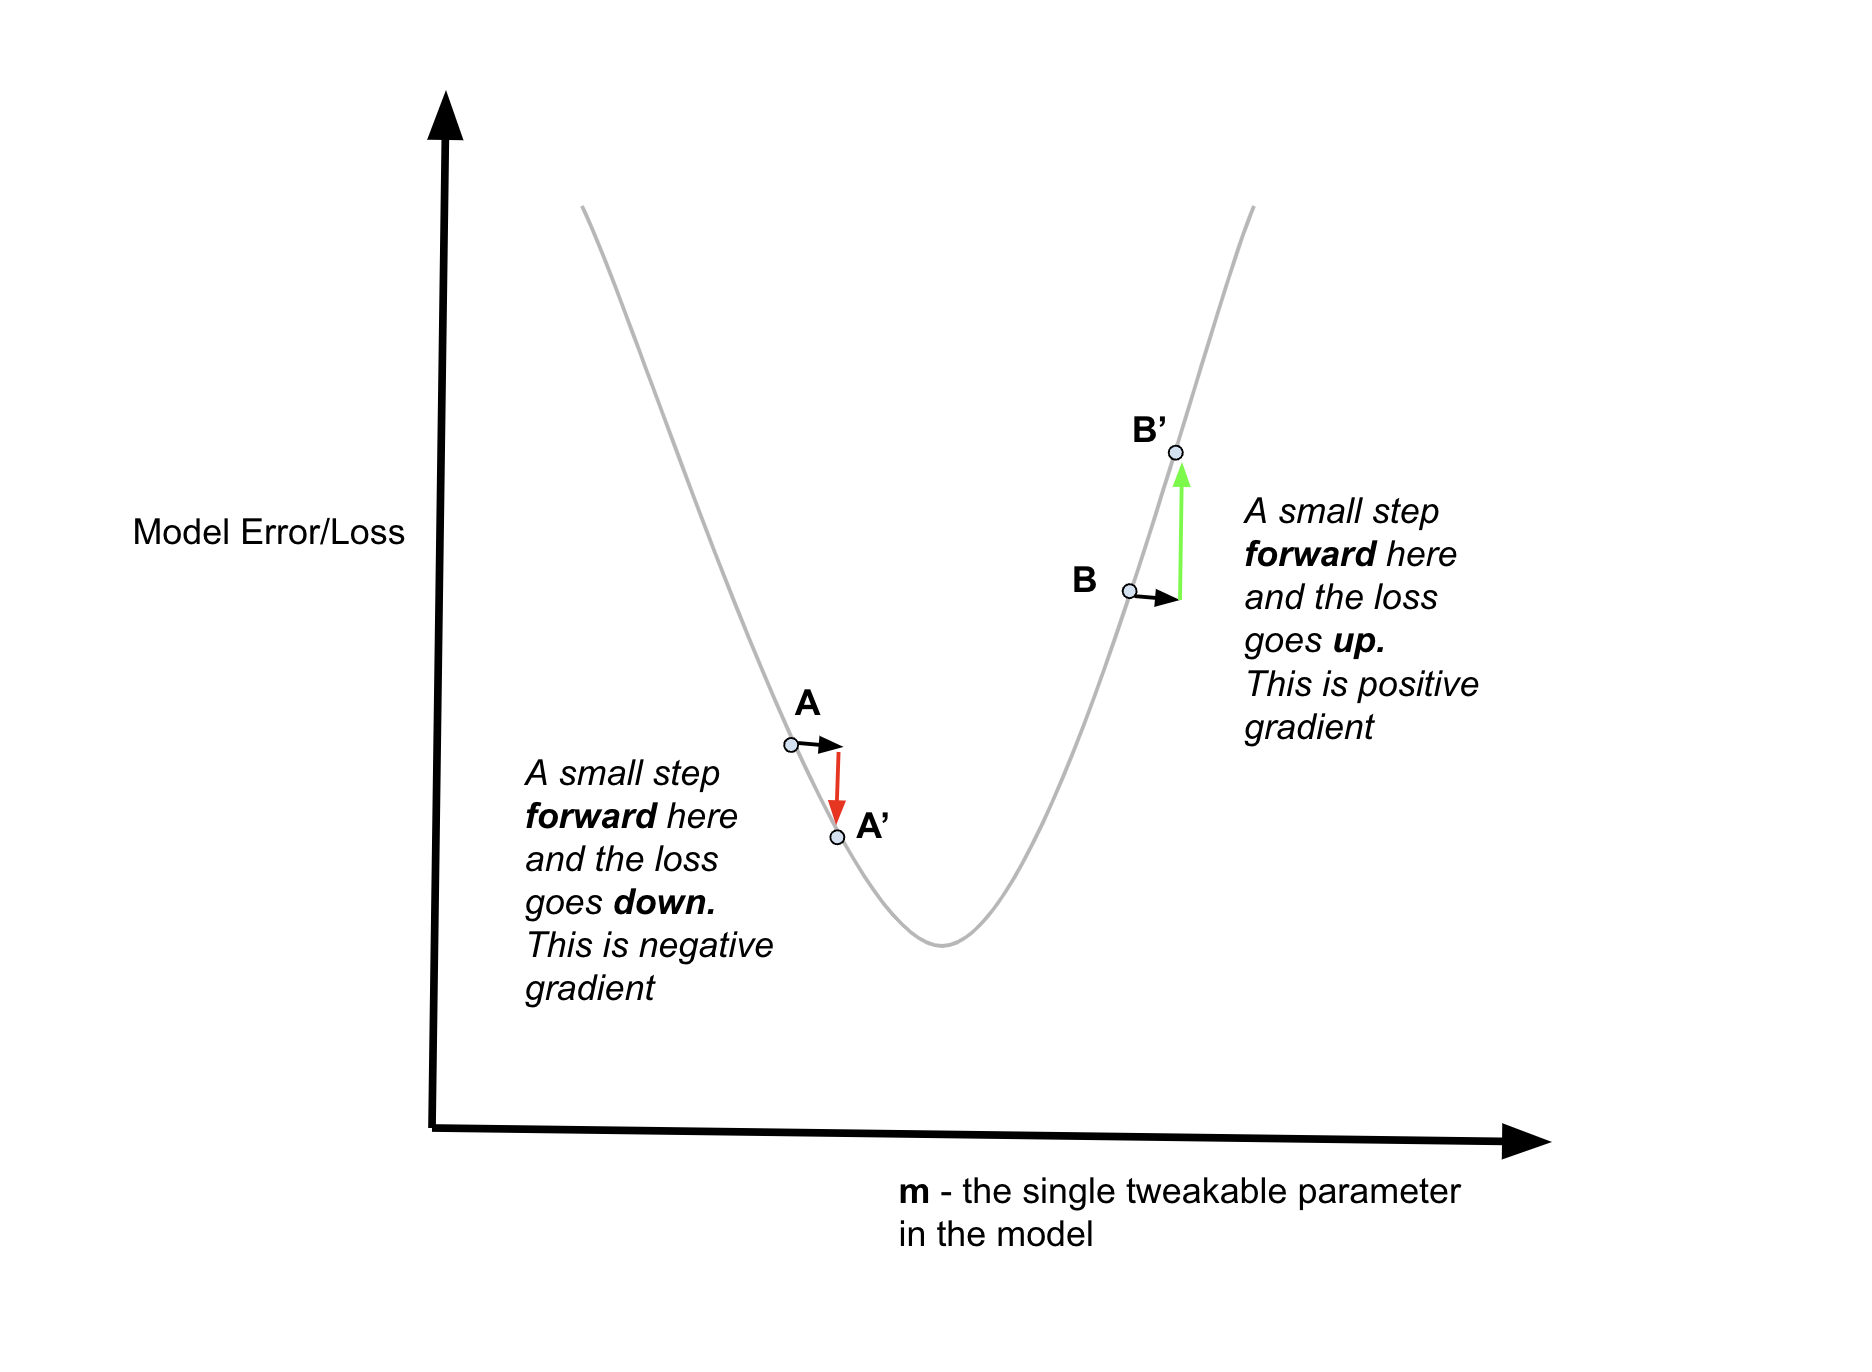



For instance, if we are at point **A** in the figure above and add a small amount to **m**, the loss goes down and we end up at **A'**. The slope or gradient of the line connecting **A** and **A'** is   (y2-y1)/(x2-x1), where **A** is x1,y1 and **A'** is x2,y2. This gradient is negative (the function value went down)

If we are at point **B** and add a small amount to **m**, the loss goes up and we end up at **B'**. This gradient of the line connecting **B** and **B'** is positive (the function value went up).

So gradient gives us two pieces of information.  
-  **Direction of the function response**. That is does the function go up or down when we increase the input a little
-  **Magnitude  of the function response**. For example, the function response at **A** is less than the response at **B** in the figure above, for the same increment of the input

We can use the information gradient gives, to move up or down the loss function curve.
- To move up the loss function from a point, just add the gradient (or a small fraction of it) to the value of **m** at that point.
- To move down the loss function just subtract the gradient (or a small fraction of it).
- This observation is true regardless of the shape of the loss function and the initial value of **m**. That is we can start with any random value of **m** and still walk downhill to the minimum loss value.

We will use this observation to minimize the error in our model. We will simply subtract a small portion of the gradient at **m** from the current value of **m**. We keep doing this iteratively to reduce the loss.

So the training steps captured in code below is

1. Start off with a random value of **m**, the learnable parameter. Lets say it is the x coordinate value of point **A** in the figure above
2. Compute the model output for all the training data for this value of **m**
3. Compute the average error in model prediction across all training points. This requires the training data labels - in our case home prices. This error is the model loss for this value of **m** - the y coordinate of point **A**
4. Increment **m** by adding a small value **h**
5. Compute the model output again using all the training data for this new value of m.
6. Compute the average error in model prediction across all training points. This is new point **A'** (m+h,error value)
7. Find the gradient or slope at **A**
8. Subtract the gradient (or a fraction of it) value from **m**. We have taken a step down the loss function. Essentially we are reducing the model error by subtracting the gradient
9. Repeat steps 2 through 9 to keep improving model prediction

Once the model is trained, and the value of **m** that best fits training data, is learned, we can use the model to predict home prices for room counts it has not seen during training.






### First lets create a synthetic dataset for training our toy model


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generate synthetic data
np.random.seed(0)
count = 10
rooms = np.random.randint(1, 10, size=count)
prices = 100 + 50 * rooms + np.random.normal(0, 20, count)
prices = prices.astype(int)
print(rooms)
print(prices)

[6 1 4 4 8 4 6 3 5 8]
[425 139 350 321 509 311 396 278 342 505]


### 1. Now lets train the model

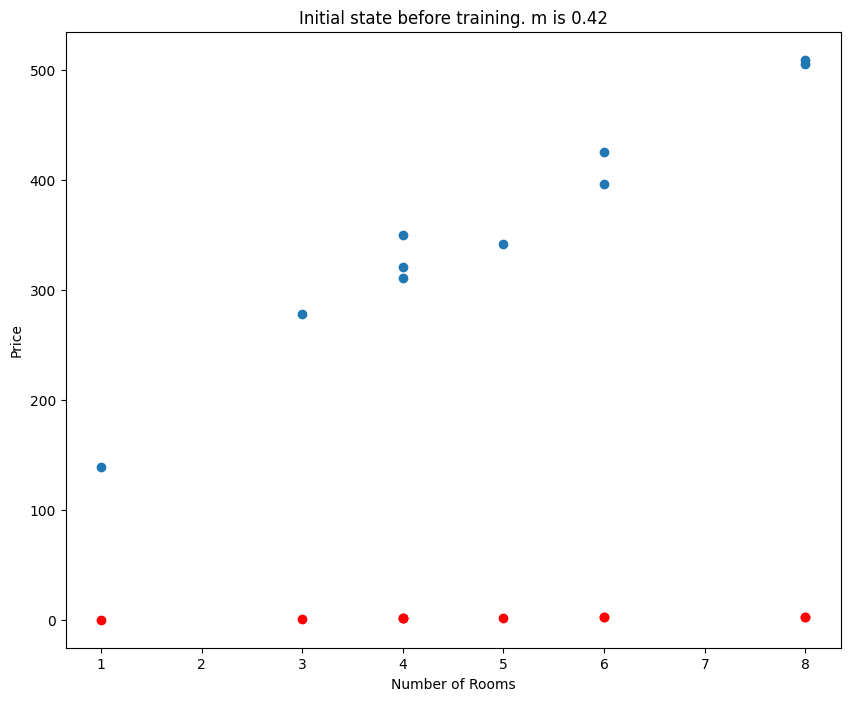

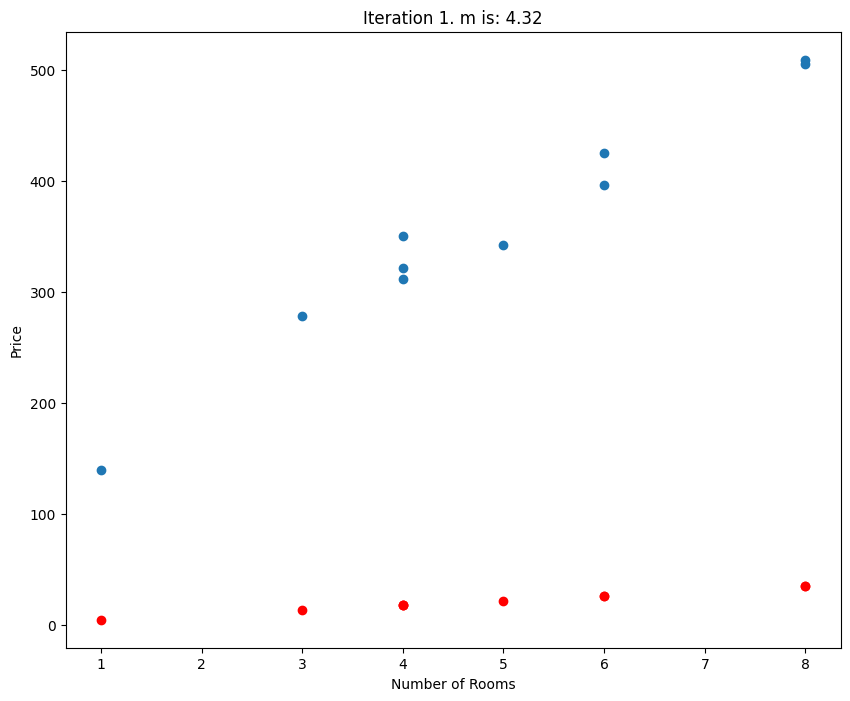

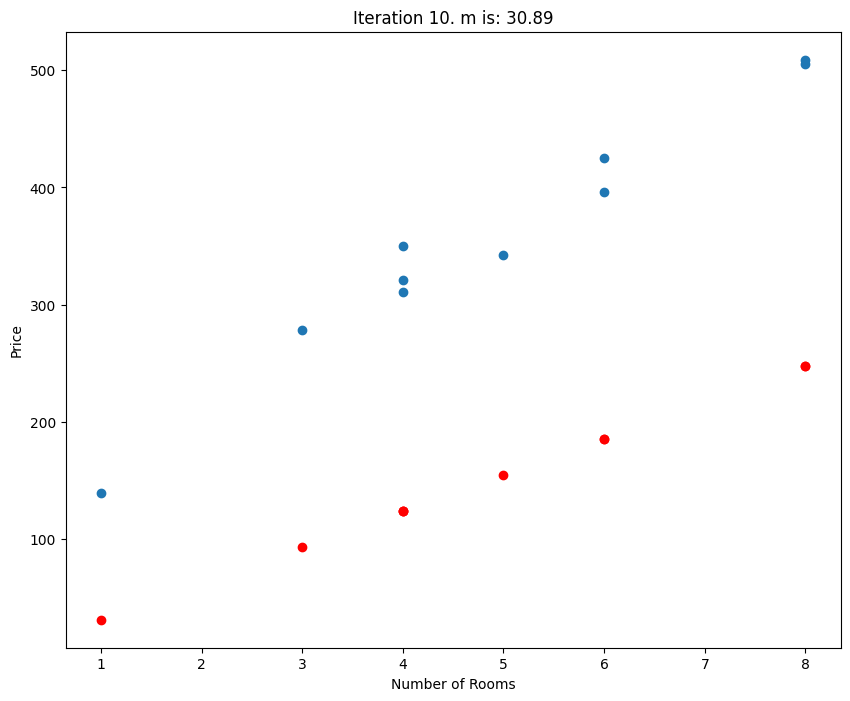

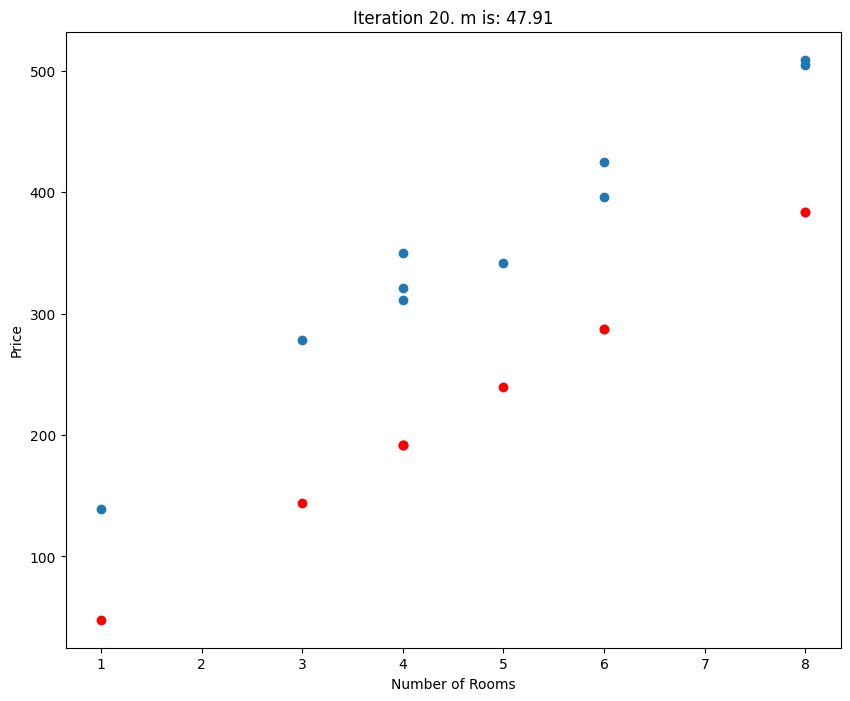

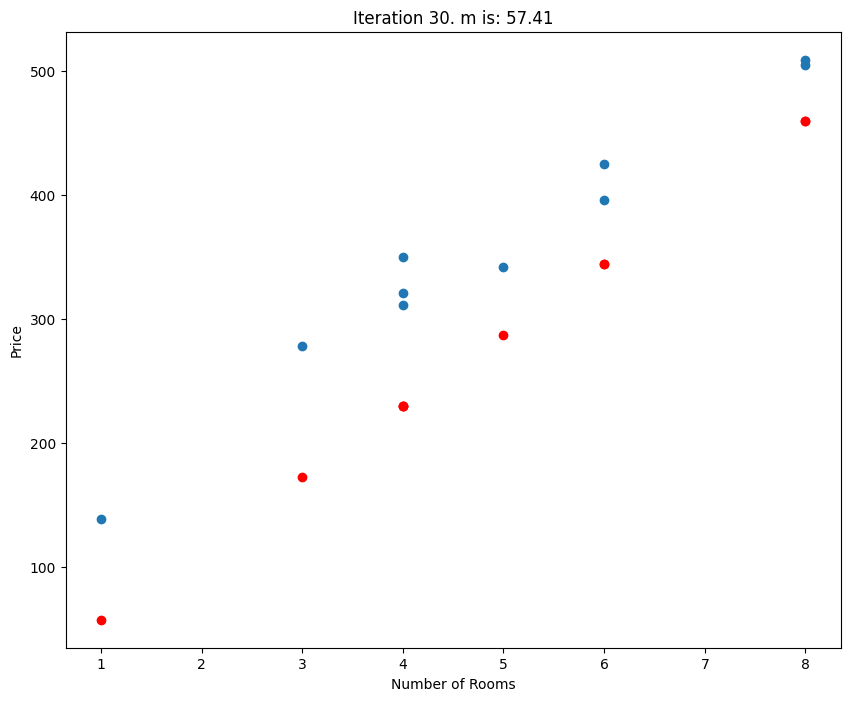

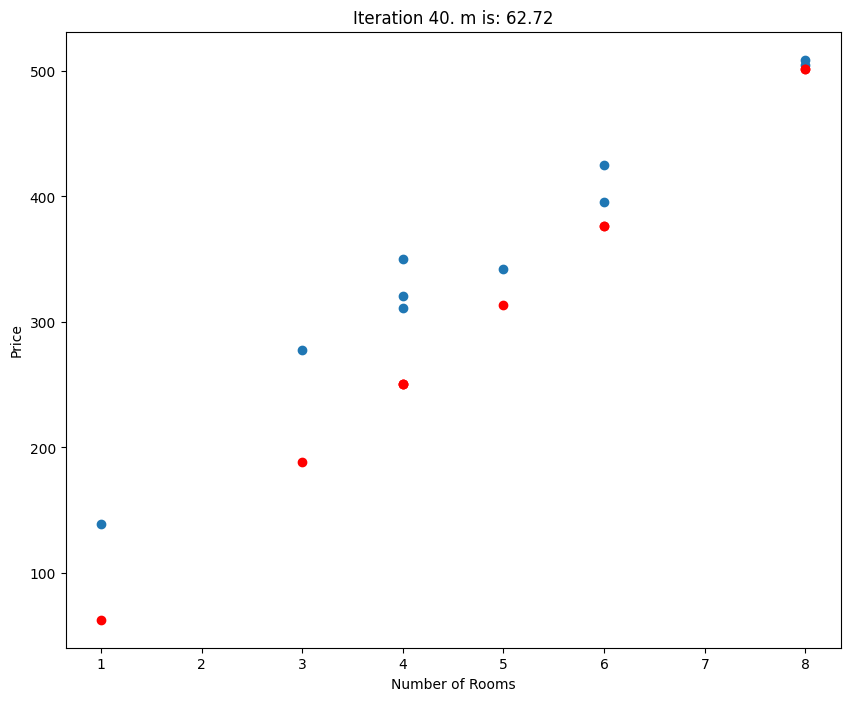

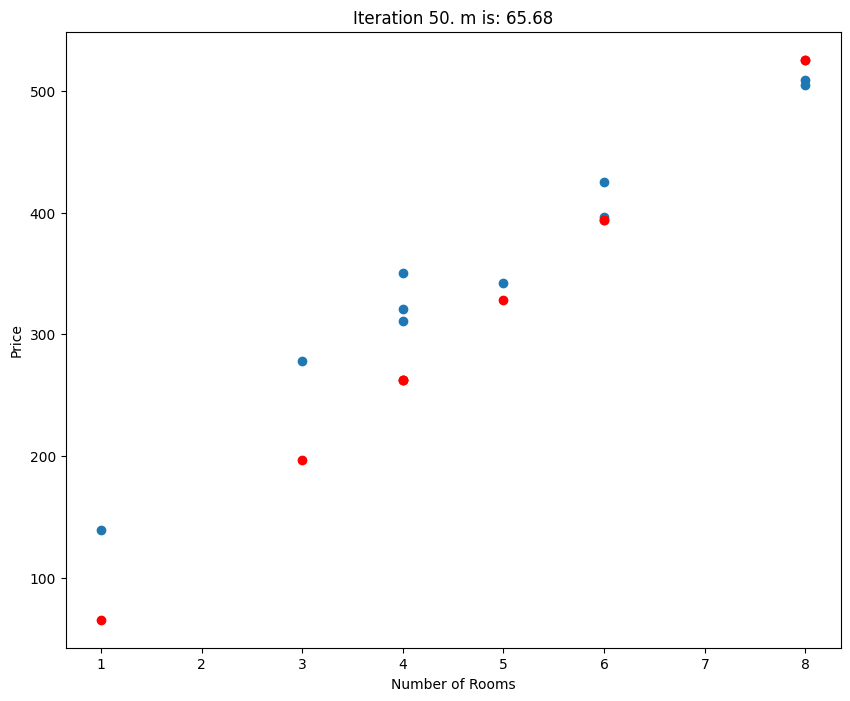

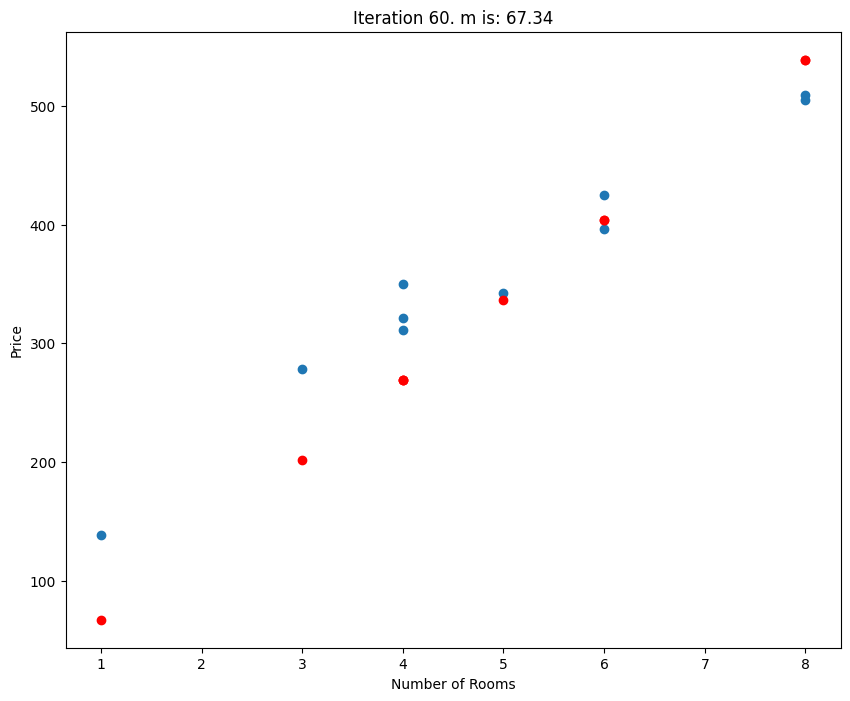

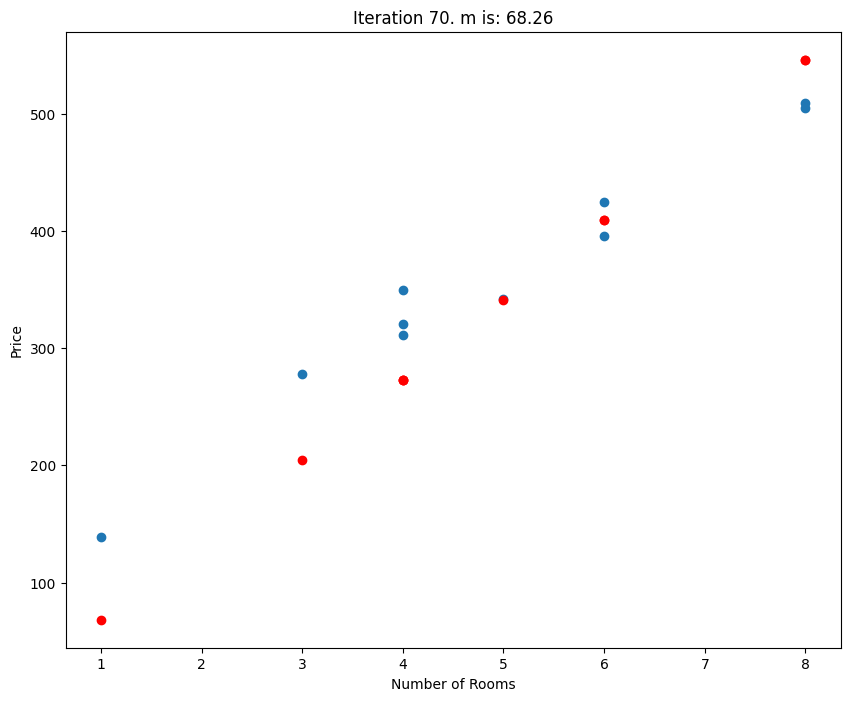

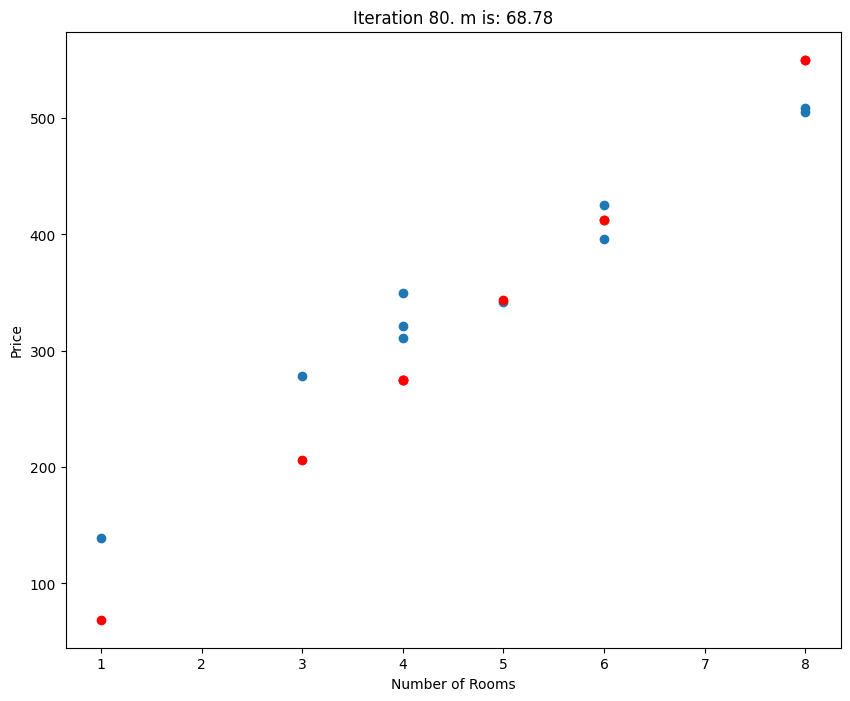

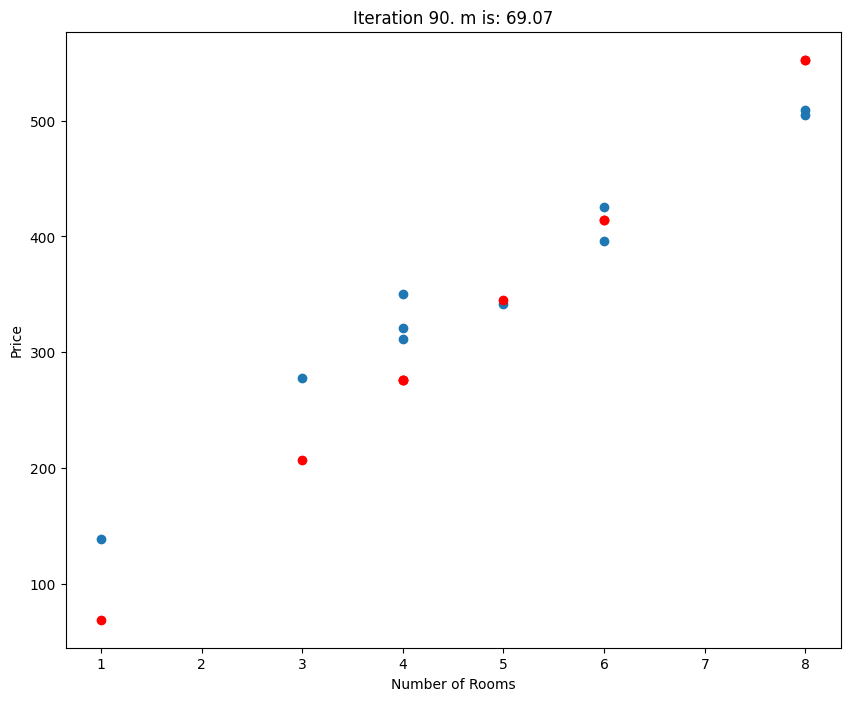

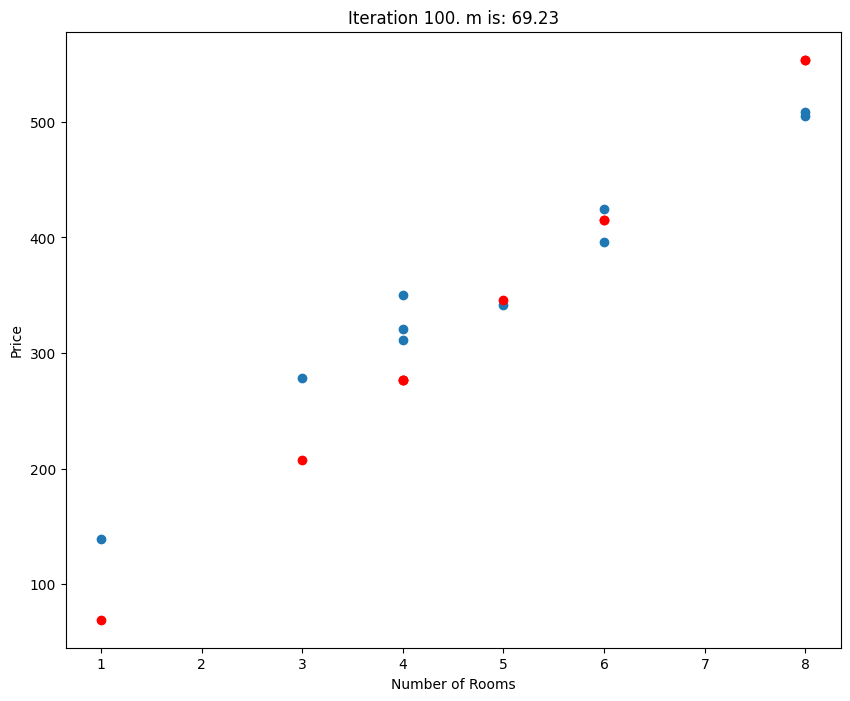

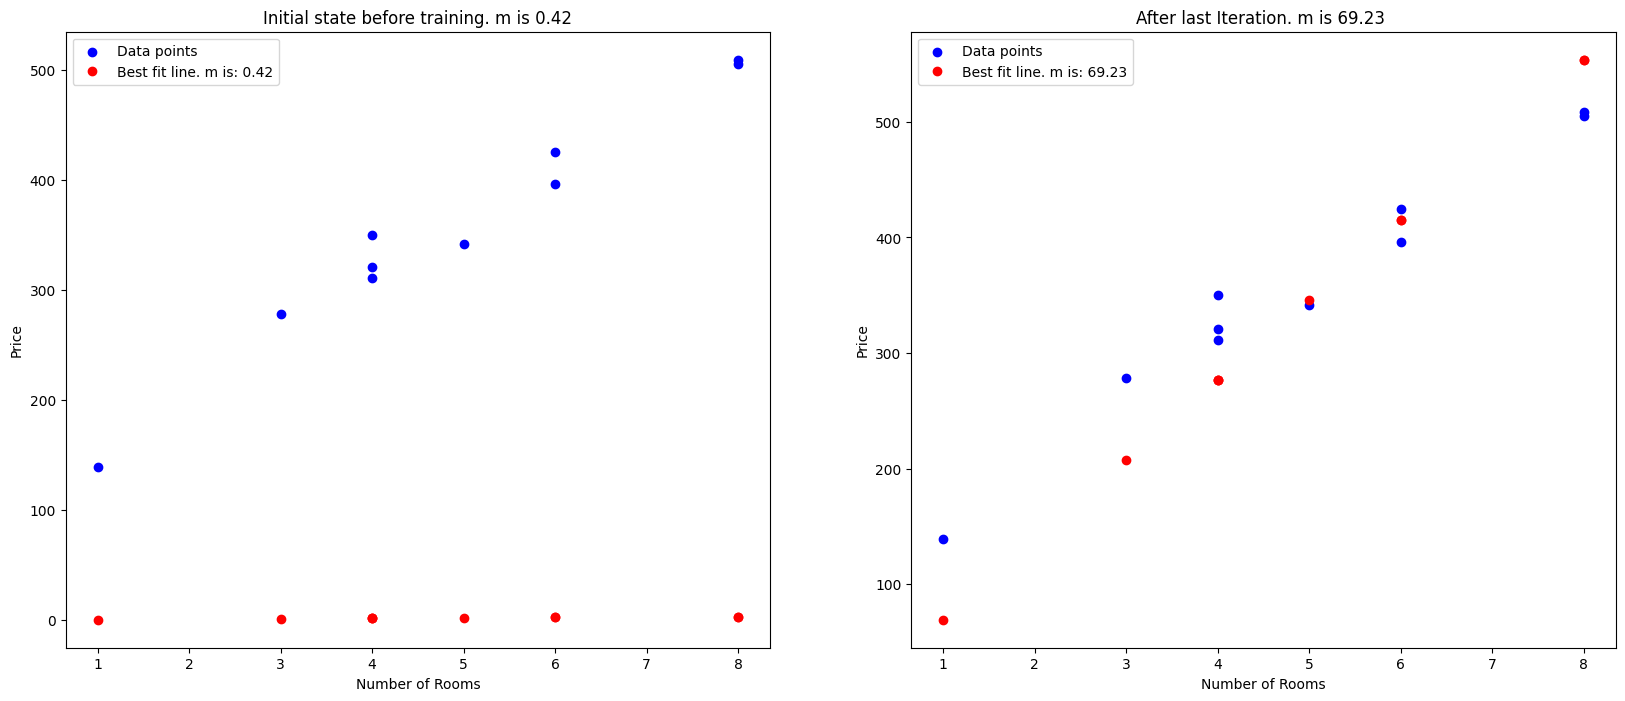

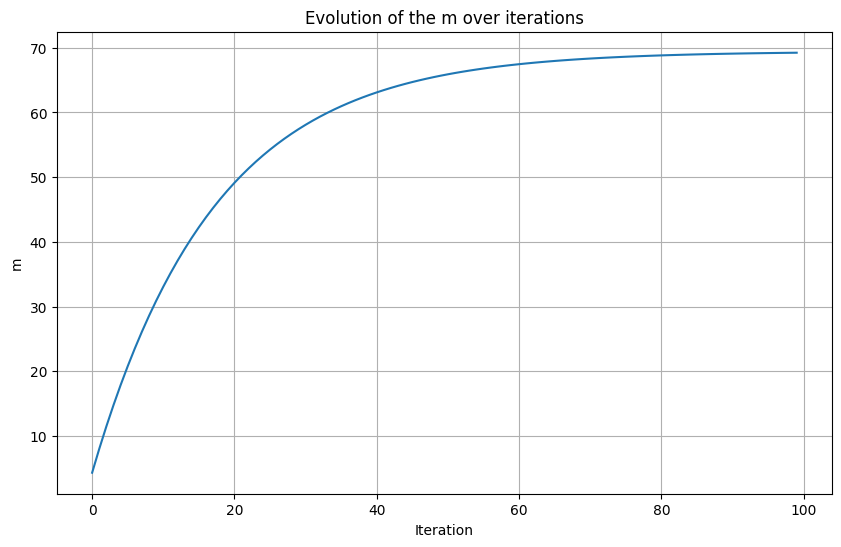

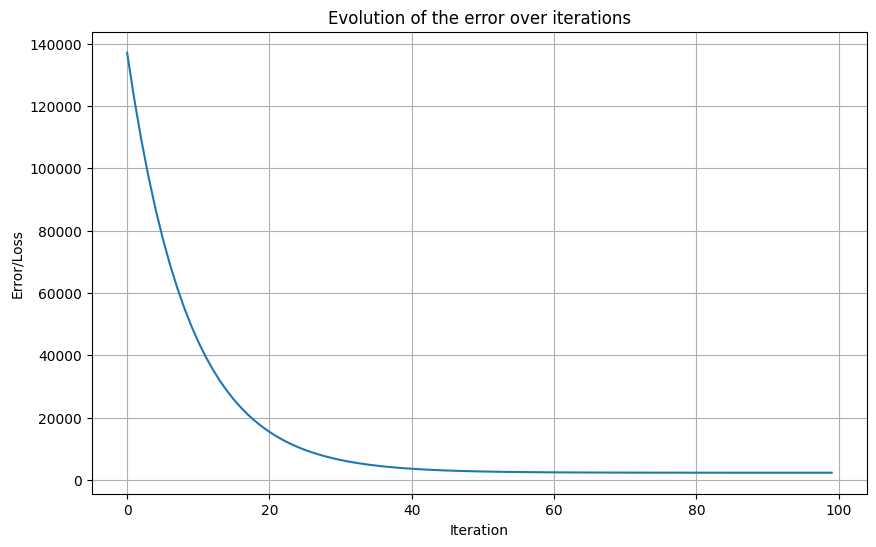

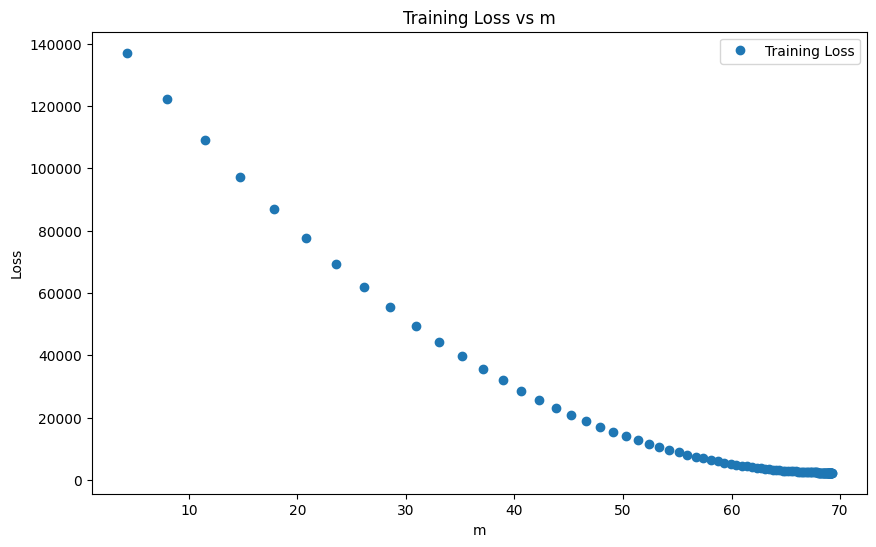

In [ ]:
# Define function to predict prices
def predict_price(slope, rooms):
    return slope * rooms


# learning rate and number of iterations
lr = 0.001 #Tweak this to see how the model learning converges.
#lr = .05 #For example, this setting will show the oscillatory behavior of learning.

iterations = 100 #this could be a useful value to tweak too

# initialize m (slope) with a random value. The seed is used to have the model start
#with the same random seed. Change the seed value to start off with a different random value
np.random.seed(1)
slope = np.random.rand()
#print(f"Intital slope chosen at random:{slope}")

# training process
history_slope = []

history_error = []


#gradient step
h = .0001 #This value is used an approximation for the derivative
          #in Calculus (essentially the rate of change of a function at a point).
          #the smaller the value the closer it approximates the derivative at a point


# Plot the points before training starts with the
#initial random value of m
first_slope = slope
plt.figure(figsize=(10, 8))
plt.scatter(rooms, prices)
pred_prices_vals = predict_price(slope, rooms)
plt.plot(rooms, pred_prices_vals,'o', color='red')
plt.title(f'Initial state before training. m is {slope:.2f}')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

for i in range(1,iterations + 1):
    #predict prices using m
    #note rooms here contains all room counts of all the data points
    #in our training set. The predicted prices is also an array (or vector) that
    #hold the corresponding prices of those homes
    pred_prices = slope * rooms


    #  calculate the average error across all training points
    #this is a single number
    error = np.mean((pred_prices - prices)*(pred_prices - prices))

    # save error history for plotting
    history_error.append(error)


    #Now bump up the slope a little.
    #This is the forward step in the x direction discussed above.
    slope_step = slope + h

    #Now Compute predicted prices with this forward step in m
    pred_prices_step =  slope_step * rooms

    #Calculate the average error in prediction after the forward step in the x direction
    step_error = np.mean((pred_prices_step - prices)*(pred_prices_step - prices))

    #Now calculate gradient:-  f(x+h) - f(x)/h
    gradient = (step_error  - error)/h

    #Update slope. We subtract the gradient because we are walking downhill
    slope -= lr * gradient

    #save slope for plotting
    history_slope.append(slope)


    # visualization
    if (i == 1 or i % 10 == 0):
      plt.figure(figsize=(10, 8))
      plt.scatter(rooms, prices)
      pred_prices_vals = predict_price(slope, rooms)
      plt.plot(rooms, pred_prices_vals,'o', color='red')
      plt.title(f'Iteration {i}. m is: {slope:.2f}')
      plt.xlabel('Number of Rooms')
      plt.ylabel('Price')
      plt.show()

#End training loop


# Predict prices for the first and last iterations
last_slope = history_slope[-1]

pred_prices_first_iter = predict_price(first_slope, rooms)
pred_prices_last_iter = predict_price(last_slope, rooms)

# Plot the data points and the lines of best fit
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# First iteration
ax[0].scatter(rooms, prices, color='blue', label='Data points')
ax[0].plot(rooms, pred_prices_first_iter,'o', color='red', label=f'Best fit line. m is: {first_slope:.2f}')
ax[0].set_title(f'Initial state before training. m is {first_slope:.2f}')
ax[0].set_xlabel('Number of Rooms')
ax[0].set_ylabel('Price')
ax[0].legend()

# Last iteration
ax[1].scatter(rooms, prices, color='blue', label='Data points')
ax[1].plot(rooms, pred_prices_last_iter,'o', color='red', label=f'Best fit line. m is: {last_slope:.2f}')
ax[1].set_title(f'After last Iteration. m is {last_slope:.2f} ')
ax[1].set_xlabel('Number of Rooms')
ax[1].set_ylabel('Price')
ax[1].legend()


plt.show()


# Plot the evolution of the slope over iterations
plt.figure(figsize=(10, 6))
plt.plot(history_slope)
plt.title('Evolution of the m over iterations')
plt.xlabel('Iteration')
plt.ylabel('m')
plt.grid(True)
plt.show()


#Plot the evolution of error over iterations
plt.figure(figsize=(10, 6))
plt.plot(history_error)
plt.title('Evolution of the error over iterations')
plt.xlabel('Iteration')
plt.ylabel('Error/Loss')
plt.grid(True)
plt.show()


#Plot m vs error
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(history_slope, history_error,'o', label='Training Loss')

plt.title('Training Loss vs m')
plt.xlabel('m')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Note:**

- In this toy model, we only had one number to learn.  In future notebooks, will see how the same  approach can be used to train a model which has more than one number to learn.

- This learning approach applies to any neural net model. That is, even a model with billion learnable numbers, adopts the same approach.

- But In practice, we don't  compute the gradient like we did in this toy model.

  - It is inefficient, because  during each iteration, we sent the training data twice for each value of m to compute the gradient.

  - The gradient computation is not only inefficient in our toy model,  it is an approximation of the true gradient.

  - We can compute the gradient using calculus, without passing the training data through the model twice, for each value of m.  Also, the computation of gradients is done efficiently, using the **backpropagation algorithm**. We will examine this in a future notebook

  - Another simplification made in this toy model, is the update of the model parameter. We always updated the model parameter m, with a constant fraction of the gradient. In practice, this update is done using an algorithm called **gradient descent**, that decides what fraction of the gradient to use, to step down the hill, based on how steep the slope is, at each step of the training

- Regardless of these differences, this notebook illustrates the core idea in neural net training or learning.

  - That is, **finding an optimal setting of all the model parameters**, or learnable numbers, so that the **function in which they are embedded in**, **transforms the training input to produce an output**, that is as **close as possible to the corresponding training output**.

**Additional notes**
* We used the word slope and gradient interchangeably above. In case of models with more than one parameter, the gradient offers richer information than just slope. The gradient is the direction of the **steepest descent**.
* Finding the the correct value of **m** for this line fitting problem, can be done by other means. It does not require a machine learning model. We use machine learning approach to solve this problem, to illustrate how neural networks with large number of parameters learn.
* In this toy model we chose a simple function - a straight line to fit the data. One could ask why not fit a curve to the data? In practice, the choice of the function is based on the problem we want to solve. Large language models like ChatGPT have a complex function with billions of learnable parameters stacked in layers.




**Things to try**

- Change the value of learning rate to see how it impact learning. For instance setting it to .05 will show oscillatory behavior. This is because slope values can be high and take a significant proportion of them can cause the oscilatory behavior
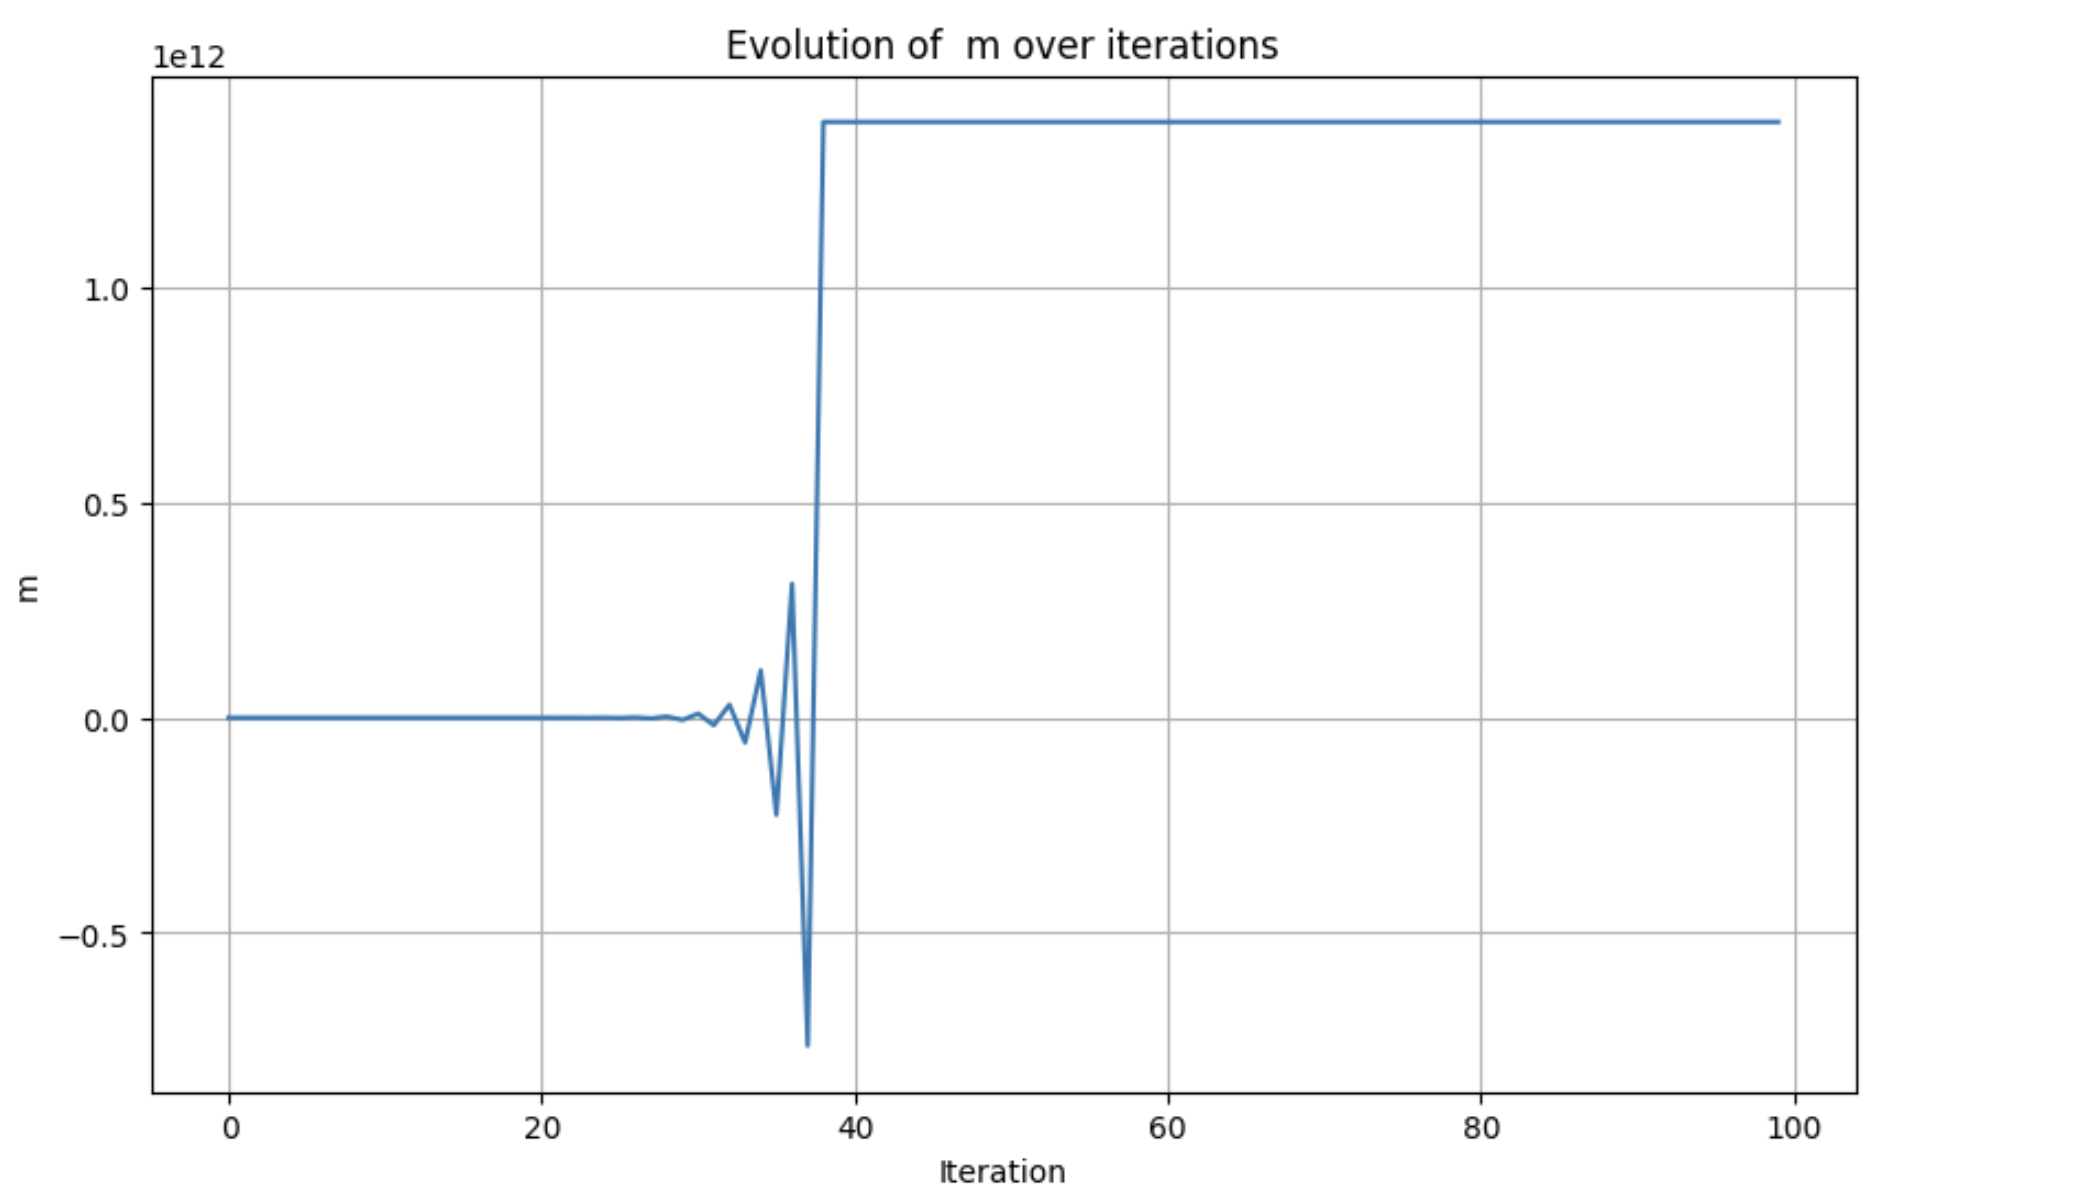

- Change the value of the step h. Smaller the value, the closer we get to the derivate or range of change of a function at a point. Note this hyperparameter will not be present to tweak in a neural net model we use in practice where rate of change is done by a derivative.

- Iterations is useful hyperparameter (the prefix hyper here is used to differentiate from model parameter) to tweak too